In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statistics import mode

2022-10-01 11:46:29.191241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
data = pd.read_csv("../data/curated/outliers_removed.csv")

In [3]:
y = data['Weekly Rental Price']
x = data[['Postcode','Baths', 'Population', 'Count_School', 'Count_Station', 'Bedrooms']]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [4]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [5]:
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(6,)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.01)),
])

2022-10-01 11:46:43.112518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(optimizer = "adam",
              loss='mean_squared_logarithmic_error',
              metrics=['msle'])

In [7]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
797/797 [==============================] - 3s 3ms/step - loss: 9.9381 - msle: 9.1362 - val_loss: 3.0680 - val_msle: 1.7711
Epoch 2/100
797/797 [==============================] - 2s 2ms/step - loss: 2.3878 - msle: 1.0185 - val_loss: 1.9296 - val_msle: 0.6087
Epoch 3/100
797/797 [==============================] - 2s 2ms/step - loss: 1.6720 - msle: 0.4913 - val_loss: 1.4519 - val_msle: 0.3987
Epoch 4/100
797/797 [==============================] - 1s 2ms/step - loss: 1.2950 - msle: 0.3450 - val_loss: 1.1556 - val_msle: 0.2989
Epoch 5/100
797/797 [==============================] - 1s 2ms/step - loss: 1.0540 - msle: 0.2600 - val_loss: 0.9639 - val_msle: 0.2292
Epoch 6/100
797/797 [==============================] - 2s 2ms/step - loss: 0.8984 - msle: 0.2049 - val_loss: 0.8393 - val_msle: 0.1848
Epoch 7/100
797/797 [==============================] - 1s 2ms/step - loss: 0.7943 - msle: 0.1705 - val_loss: 0.7516 - val_msle: 0.1568
Epoch 8/100
797/797 [==============================] - 

In [8]:
model.evaluate(X_test, Y_test)[1]

171/171 [==============================] - 0s 1ms/step - loss: 0.0954 - msle: 0.0720


0.07199540734291077

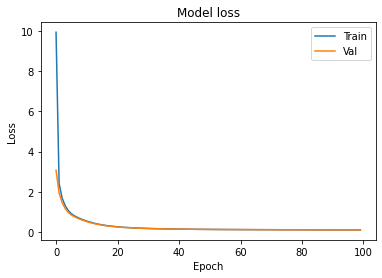

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

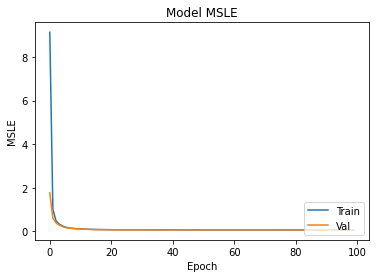

In [10]:
plt.plot(hist.history['msle'])
plt.plot(hist.history['val_msle'])
plt.title('Model MSLE')
plt.ylabel('MSLE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [11]:
prediction = model.predict(X_val)

171/171 [==============================] - 0s 833us/step


In [12]:
# calculate the absolute errors
error = prediction - Y_val[1]
error = [abs(x) for x in error]

# print out the mean absolute error (mae)
np.mean(error)

13.370573

In [13]:
# calculate the absolute errors of baseline model
y_mode = mode(Y_val)
baseline_error = [abs(y_mode-x) for x in Y_val]
np.mean(baseline_error)

91.83942998027614

In [30]:
pop = pd.read_csv("../data/curated/predicted_population.csv")

In [31]:
post_data = data[['Postcode', 'Baths','Population', 'Count_School', 'Count_Station','Bedrooms','Weekly Rental Price']]

In [32]:
pop_2023 = pop[['Postcode','2023']]
pop_2024 = pop[['Postcode','2024']]
pop_2025 = pop[['Postcode','2025']]

In [33]:
pop_2023 = pd.merge(pop_2023, post_data, how='inner', on=['Postcode'])
pop_2023 =pop_2023.drop(labels=['Population'],axis=1) 
pop_2023 = pop_2023[['Postcode', '2023', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [34]:
pop_2023['Count_School'] = pop_2023['Count_School'].fillna(value = 0)
pop_2023['Count_Station'] = pop_2023['Count_Station'].fillna(value = 0)
pop_2023 = pop_2023.dropna(axis=0)
pop_2023 = pop_2023[(pop_2023['Baths'] > 0) & (pop_2023['Bedrooms'] > 0)]
pred_2023 = model.predict(pop_2023)
data.insert(6, 'Pred_2023', pred_2023)

1138/1138 [==============================] - 2s 1ms/step


In [35]:
pop_2024 = pd.merge(pop_2024, post_data, how='inner', on=['Postcode'])
pop_2024 =pop_2024.drop(labels=['Population'],axis=1) 
pop_2024 = pop_2024[['Postcode', '2024', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [36]:
pop_2024['Count_School'] = pop_2024['Count_School'].fillna(value = 0)
pop_2024['Count_Station'] = pop_2024['Count_Station'].fillna(value = 0)
pop_2024 = pop_2024.dropna(axis=0)
pop_2024 = pop_2024[(pop_2024['Baths'] > 0) & (pop_2024['Bedrooms'] > 0)]
pred_2024 = model.predict(pop_2024)
data.insert(7, 'Pred_2024', pred_2024)

1138/1138 [==============================] - 2s 2ms/step


In [37]:
pop_2025 = pd.merge(pop_2025, post_data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'],axis=1) 
pop_2025 = pop_2025[['Postcode', '2025', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [38]:
pop_2025['Count_School'] = pop_2025['Count_School'].fillna(value = 0)
pop_2025['Count_Station'] = pop_2025['Count_Station'].fillna(value = 0)
pop_2025 = pop_2025.dropna(axis=0)
pop_2025 = pop_2025[(pop_2025['Baths'] > 0) & (pop_2025['Bedrooms'] > 0)]
pred_2025 = model.predict(pop_2025)
data.insert(8, 'Pred_2025', pred_2025)

1138/1138 [==============================] - 2s 2ms/step


In [39]:
data

,Unnamed: 0,Postcode,Baths,Population,Count_School,Count_Station,Pred_2023,Pred_2024,Pred_2025,Bedrooms,Weekly Rental Price
0,5,3000,1,34652.148872,4.0,45.0,545.472290,546.494873,547.346924,1,440.0
1,6,3000,1,34652.148872,4.0,45.0,545.472290,546.494873,547.346924,1,440.0
2,7,3000,1,34652.148872,4.0,45.0,545.472290,546.494873,547.346924,1,440.0
3,8,3000,1,34652.148872,4.0,45.0,545.472290,546.494873,547.346924,1,440.0
4,9,3000,1,34652.148872,4.0,45.0,545.472290,546.494873,547.346924,1,440.0
...,...,...,...,...,...,...,...,...,...,...,...
36395,42824,3996,1,36889.657143,0.0,0.0,552.894287,557.032898,561.354553,2,420.0
36396,42825,3996,1,36889.657143,0.0,0.0,552.894287,557.032898,561.354553,2,370.0
36397,42826,3996,1,36889.657143,0.0,0.0,552.894287,557.032898,561.354553,2,370.0
36398,42827,3996,2,36889.657143,0.0,0.0,552.893433,557.032104,561.353699,3,475.0


In [40]:
data['rate_2023'] = (data['Pred_2023'] - data['Weekly Rental Price'])/data['Weekly Rental Price']

In [41]:
data['rate_2024'] = (data['Pred_2024'] - data['Weekly Rental Price'])/data['Weekly Rental Price']

In [42]:
data['rate_2025'] = (data['Pred_2025'] - data['Weekly Rental Price'])/data['Weekly Rental Price']

In [45]:
data.drop(columns='Unnamed: 0')

,Postcode,Baths,Population,Count_School,Count_Station,Pred_2023,Pred_2024,Pred_2025,Bedrooms,Weekly Rental Price,rate_2023,rate_2024,rate_2025
0,3000,1,34652.148872,4.0,45.0,545.472290,546.494873,547.346924,1,440.0,0.239710,0.242034,0.243970
1,3000,1,34652.148872,4.0,45.0,545.472290,546.494873,547.346924,1,440.0,0.239710,0.242034,0.243970
2,3000,1,34652.148872,4.0,45.0,545.472290,546.494873,547.346924,1,440.0,0.239710,0.242034,0.243970
3,3000,1,34652.148872,4.0,45.0,545.472290,546.494873,547.346924,1,440.0,0.239710,0.242034,0.243970
4,3000,1,34652.148872,4.0,45.0,545.472290,546.494873,547.346924,1,440.0,0.239710,0.242034,0.243970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36395,3996,1,36889.657143,0.0,0.0,552.894287,557.032898,561.354553,2,420.0,0.316415,0.326269,0.336558
36396,3996,1,36889.657143,0.0,0.0,552.894287,557.032898,561.354553,2,370.0,0.494309,0.505494,0.517174
36397,3996,1,36889.657143,0.0,0.0,552.894287,557.032898,561.354553,2,370.0,0.494309,0.505494,0.517174
36398,3996,2,36889.657143,0.0,0.0,552.893433,557.032104,561.353699,3,475.0,0.163986,0.172699,0.181797


In [28]:
data.to_csv("../data/curated/NNpredi.csv")